## Part One

### Fundamentals

#### Running Code

You can create a code cell in Colab by selecting an existing cell and selecting the `+ Code` button on the top bar.

You can then enter code into a cell. For example, use `print("Hello, World!")` to say hello.

Finally, you can run code by pressing the play button next to the cell. If you want to step code before it completes, press the stop button.

Note: Python generally doesn't care about spaces or new lines, but identation does matter.

Lines beginning with `#` are not run. These are called comments.

You will find `TODO`s followed by `"_______"`s. These are for you to fill in during the breakout sessions.

#### Imports

_Live explanation_

[PyPI](https://pypi.org/)

#### Variables

Variables are a way of given Python memory. The format for assigning a value to a variable is:

```python
variable_name = value
```

Note, the variable names can only contain letters, numbers, underscores, and hyphens (no spaces!). Once a variable has been assigned a value, whenever Python sees it in the future, it will replace it with the value it was last set to.

In [7]:
rpm = 45

In [8]:
print(x)

12


In [9]:
rpm = 78

In [10]:
print(x)

12


Be careful! Google Colab lets you run cells out of order. It is advised to run things from top to bottom only to avoid confusion. To run multiple cells, look at the `Runtime` dropdown on the top bar.

High-level parameters that do not change during the script are often denoted with all-caps.

#### Variable Types

If you want to pass text data to Python, you need to explicitly use single or double quotes (they mean the seem) to let Python know that you intended to input text and not a variable.

In [2]:
greeting = 'Hello'

In [11]:
greeting = hello

NameError: name 'hello' is not defined

#### Functions

You use functions to get Python to do something. They have a common syntax:

```python
function_name(input1, input2, ...)
```

Some functions _return_ a value, in which case we can assign this to a variable.

```python
variable = function_name(input1, input2, ...)
```

Some inputs have names, in which case we use this syntax.

```python
function_name(input1, named_input=input2)
```

Functions that belong to a certain package/module can be accessed using dot notation.

In [40]:
import numpy as np
np.identity(2)

array([[1., 0.],
       [0., 1.]])

In [41]:
np.random.uniform(size=(2, 3))

array([[0.50523498, 0.09872538, 0.44996275],
       [0.56775269, 0.01496863, 0.5246139 ]])

#### Data Structures

There are two key data structures we will be using.

The first is the list. This is used to store a sequence of ordered elements. We use square brackets to create them.

In [19]:
past_olympics_hosts = ['Rio', 'London', 'Beijing', 'Athens']

We can then access the elements using non-negative integers (think of these as 'house numbers' for data but starting at zero) and square brackets.

In [26]:
past_olympics_hosts[1]

'London'

Another useful structure is the dictionary. This is used for mapping a key to a value. We create them using curly brackets containing comma-separated key value pairs.

In [22]:
capitals = {
    'spain': 'madrid',
    'france': 'paris',
    'portugal': 'lisbon'
}

We access these in the same way as lists, but using a key rather than an index.

In [27]:
capitals['spain']

'madrid'

#### For Loops

Loops allow us to run a block of code multiple times. The most common type is a for loop. This iterates over a data structure, using a temporary variable to keep track of where we are. The notation is as follows.

In [29]:
for n in range(2, 5):
    print(n)

2
3
4


In [33]:
for city in past_olympics_hosts:
    print("-", city)

- Rio
- London
- Beijing
- Athens


### The Spotify API

#### APIs

_Live explanation_

Example: `https://www.googleapis.com/books/v1/volumes?q=isbn:9781491912058`

[List of public APIs](https://github.com/public-apis/public-apis)

#### The Spotiy API

Anyone with a Spotify account (free or premium) can use Spotify API at no cost. 

First, visit [developer.spotify.com/](https://developer.spotify.com/), sign-in, and select 'Dashboard' form the top bar.

From here, click 'Create an App' and fill in the details. These can be anything reasonable. For example, "WDSS Spotify Workshop", "An app for learning about the Spotify API" would do.

Each app has a client ID and secret. There's no real harm in sharing either but it is best practice to keep both or at the very least the secret hidden. You will need to use these when creating a connection to the API in the template.

#### Spotipy

We could access the Spotify API directly using web requests, but this is added work. Instead,n rather than reinventing the wheel, we use `spotipy`, a Python wrapper for the API. We create a client `sp` using our authentication keys and then access its methods to make queries. For example, `sp.featured_playlists()` will get a list of Spotify's featured playlists.

Note, certain `spotipy` features won't work without setting up OAuth.

[Spotipy documentation](https://spotipy.readthedocs.io/en/2.15.0/#)

#### Usernames

You can find your Spotify username by visiting your profile on the web or by sharing a link to your account and copying the code between `user/` and `?si` (the latter might not be there). 

For example, the profile share link for WDSS is `https://open.spotify.com/user/vr1q8on6ji60ceo0kregujkkx?si=WaNuj8aORWmrxEdTfG9OTQ` and our username is `vr1q8on6ji60ceo0kregujkkx`.

If you cannot find your own username, just use ours!

### Data Scraping

#### Pagination

The Spotify API returns results using pagination. That is, only a certain number of items are returned at a time and you have to request 'page 2', etc. This is all taken care of using the `depaginate` helper, which flattens these results into one list (a generator to be precise).

#### Audio Features

The Spotify API enables you to collect audio features about any tracks including tempo, key, instrumentalness, and danceability.

We will use these as the foundation for laying out our wall of music.

[List of available audio features](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

> **Breakout Session One**
>
> Complete the setup and data scraping steps of the template

## Part Two

### Pre-processing

#### Dataframes

Dataframes are a more powerful data structure not included in base Python. Instead, we gain access to these by importing `pandas` (under the alias `pd`). You can print out a dataframe by typing its name in a cell of its own. If you only want the first few rows use `df_name.head()` and `df_name.tail()` for the bottom.

#### Sampling

Our end goal is to create a grid of cover arts. This dimensions of this grid will be determined by the number of tracks in our playlist. If we have 100 tracks then we get a perfect 10-by-10 square. If we add one more to make 101, we now have a prime number of tracks so the best we can do is 1-by-101.

This would look ridiculous and so we use the parameter `MIN_RATIO` to set the minimum ratio between side lengths that we are willing to accept.

Then, we take our initial number of tracks and reduce it until we can form a rectangle with sides meeting this constraint. This is handled by the `find_valid_sample_count(...)` helper.

We then randomly sample this many rows from the table.

#### Feature Engineering

Most of our audio features are ready for use, but the `key` column is certainly not. The twelve western keys are encoded using the numbers 0 to 11. This is inappropriate as it puts the keys C and B at a distance of 11 even though the come right next to each other.

| Key | Encoding |
|:---:|:--------:|
|  C  |     0    |
|  Db |     1    |
|  D  |     2    |
|  Eb |     3    |
|  E  |     4    |
|  F  |     5    |
|  F# |     6    |
|  G  |     7    |
|  Ab |     8    |
|  A  |     9    |
|  Bb |    10    |
|  B  |    11    |

What we need is a cyclic system. To do this we space the keys around a unit circle and record their x and y coordinates. Now, the key is represented by two variables instead of one but the distance between keys is now correct.

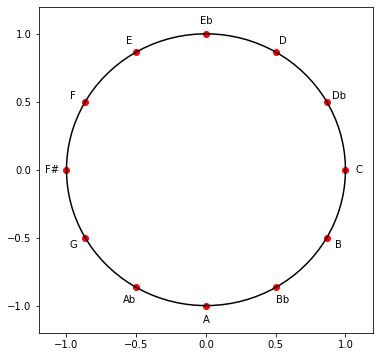

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
x_circ = np.cos(np.linspace(0, 2 * np.pi, 100))
y_circ = np.sin(np.linspace(0, 2 * np.pi, 100))
ax.plot(x_circ, y_circ, c='k')
x_key = np.cos(np.linspace(0, 11/6 * np.pi, 12))
y_key = np.sin(np.linspace(0, 11/6 * np.pi, 12))
s_key = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
ax.scatter(x_key, y_key, c='r')
for x, y, s in zip(x_key, y_key, s_key):
    ax.text(x * 1.1, y * 1.1, s, ha='center', va='center')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
plt.show()

There's also this thing called the circle of fifths. If you don't know music theory, this is not worth sweating about. The bottom line is, there are two ways of measuring the distance between keys: melodically and harmonically. Both of these are useful for us and so we use the helper `mel_to_harm` to convert the keys to an encoding that respresents harmonic distance and repeat the above process. 

![Circle of Fifths](https://hellomusictheory.com/wp-content/uploads/2020/07/circle-00-768x767.png)

#### Standardisation

Our variables exists on wildly different scales (compare `tempo` to `key`, or even `duration_ms`). We standardise these by centering them around zero and dividing so we are left with unit variance.

That may sound like statistical gibberish (and to be fair, it is) but thankfully, we can easily do this by fitting and transforming a `StandardScaler` on our feature dataframe.

### Dimensionality Reduction

#### Embeddings

In all, we collect 13 audio features and transform these into 16. Visualising three dimensions is hard enough and so 16 is out of the question.

This is no problem though; after all, a painting is a two dimensional representation of a 3D world. We simply need to reduce these 16 dimensions to two.

We can achieve this by using an embedding. The goal of embeddings is to reduce the dimension of a space whilst retaining as much of the original structure as possible. There are two types of structure we care about:

- **Global:** large clusters in the high-demensional space should cluster together in the low-dimensional space
- **Local:** neighbours in the high-dimensional space should remain neighbours

In reality, a compromise between these two is needed, and we can control this balance using _hyperparameters_.

We use the `UMAP` algorithm to embed our data, using the same `fit_transform` procedure as before.

> **Breakout Session Two**
>
> Complete the pre-proccessing and the embedding step

## Part Three

#### Rasterfication

The embedding leaves us with a contiuous 2D space, however we want a grid. We can therefore use the wonder `rasterfairy` package to _rasterfy_ (pretty sure I've made this word up, so use it carefully) our points.

A raster image is one made up of square pixels, hence where the package name and process derives from.

We've already seen how to create a plot in the embedding section so there are a lot more gaps to fill in this second time.

### Visualisation

#### Image Creation

We create the final image by stitching together multiple, individual cover arts. A perculiar point to note is that all of our dimensions seem to be reversed...because they are!

Matrices represent their data using the y (row) coordinate, leading to some confusing code. You get used to the conversion with practice though.

#### The Final Product

Lastly, we have a mammoth code block used to create an interative visualisation. This uses some sneaky tricks such as using an invisible heatmap (`opacity=0`) to add labels to a background image.

Note, you can add the audio features to the hover text by add `included` as a second argument to the create `create_hover_text` helper.

If you are running this on Colab, you might crash the kernel if you use too many images. This is because Colab supplies you with a limited amount of memory (admittedly for free, so you can't complain). For larger images, either skip the interactive visualisation and export to a PNG or run the code on your local computer (instructions [here](https://github.com/warwickdatascience/spotify-workshop)).

#### Wrapping Up

Follow WDSS on [Facebook](https://www.facebook.com/warwickdatasciencesociety), [LinkedIn](https://www.linkedin.com/company/warwickdatasciencesociety/), [Instagram](https://www.instagram.com/warwickdatasciencesociety/).

Join our [community group](https://www.facebook.com/groups/wdss.community).

[Subject examples](https://github.com/warwickdatascience/subject-examples/tree/master/python) and [research blog](http://research.wdss.io/).

Know a graphic designer? [Ignore the deadline](https://recruitment.warwickdatascience.com/wdss-graphic-designer).